In [ ]:
#import libararies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

A cloth manufacturing company is interested to know about the segment or attributes which causes high sale, using Random forest.

In [ ]:
#reading the csv file
company = pd.read_csv("/content/Company_Data (1).csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
#checking the basic info from the data
company.shape

(400, 11)

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
company[company.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


Convert "Sales" into a categorical variable "High_Sales":

In [ ]:
# Calculate the median sales value
median_sales = company['Sales'].median()
print(median_sales)

7.49


In [ ]:
# Create a new categorical variable 'High_Sales'
company['High_Sales'] = company['Sales'].apply(lambda x: 'Yes' if x > median_sales else 'No')

In [ ]:
# Drop the original 'Sales' column as it's no longer needed
company.drop('Sales', axis=1, inplace=True)

In [ ]:
# View the updated dataset with the 'High_Sales' column
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


Label encoding for categorical values

In [ ]:
label_encoder=preprocessing.LabelEncoder()
company["ShelveLoc"]=label_encoder.fit_transform(company["ShelveLoc"])
company["Urban"]=label_encoder.fit_transform(company["Urban"])
company["US"]=label_encoder.fit_transform(company["US"])

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    int64 
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    int64 
 9   US           400 non-null    int64 
 10  High_Sales   400 non-null    object
dtypes: int64(10), object(1)
memory usage: 34.5+ KB


Prepare the data:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separate the target variable and independent features
X = company.drop('High_Sales', axis=1)
y = company['High_Sales']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# View the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 10)
y_train shape: (320,)
X_test shape: (80, 10)
y_test shape: (80,)


Build and train the Random Forest model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the model's performance:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Make predictions on the training data
y_pred = rf_model.predict(X_train)

In [ ]:
# Calculate accuracy and print the classification report and confusion matrix
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       164
         Yes       1.00      1.00      1.00       156

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_pred))


Confusion Matrix:
[[164   0]
 [  0 156]]


prediction on testiing data

In [ ]:
# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate accuracy and print the classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.825


In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[31  6]
 [ 8 35]]


### Analyze feature importances:

In [ ]:
# Get the feature importances from the trained model
feature_importances = rf_model.feature_importances_

In [ ]:
# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

In [ ]:
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Print the feature importances
print("\nFeature Importances:")
print(feature_importances_df)


Feature Importances:
       Feature  Importance
4        Price    0.250713
6          Age    0.147998
0    CompPrice    0.119899
2  Advertising    0.104775
3   Population    0.102790
5    ShelveLoc    0.095131
1       Income    0.092131
7    Education    0.057028
8        Urban    0.018202
9           US    0.011332


In [ ]:
feature_importances

array([0.11989904, 0.09213143, 0.1047755 , 0.10278987, 0.25071332,
       0.09513079, 0.14799788, 0.05702768, 0.01820212, 0.01133236])

Bar plot -To show the important features

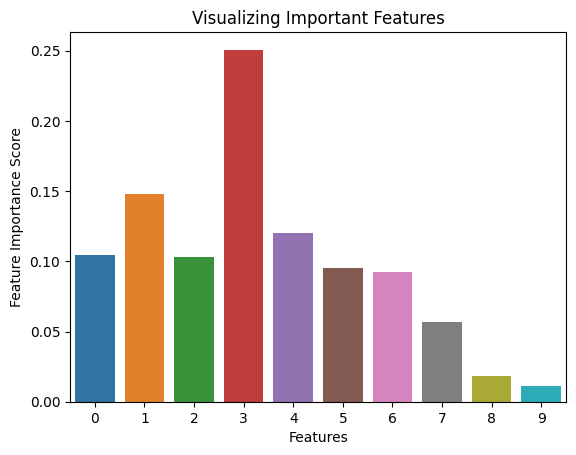

In [ ]:
sns.barplot(x=feature_importances_df.index, y=feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()


Looping function for checking the Random forest classifier in different maximum features

In [ ]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=115, max_features=6)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

 Listing the accuracies based on different maximum feature in both training and testing

In [ ]:
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.7875
1,2,1.0,0.8375
2,3,1.0,0.7750
3,4,1.0,0.8250
4,5,1.0,0.8125
5,6,1.0,0.7500
6,7,1.0,0.8000
7,8,1.0,0.8125
8,9,1.0,0.7625


Visualization using maximum features

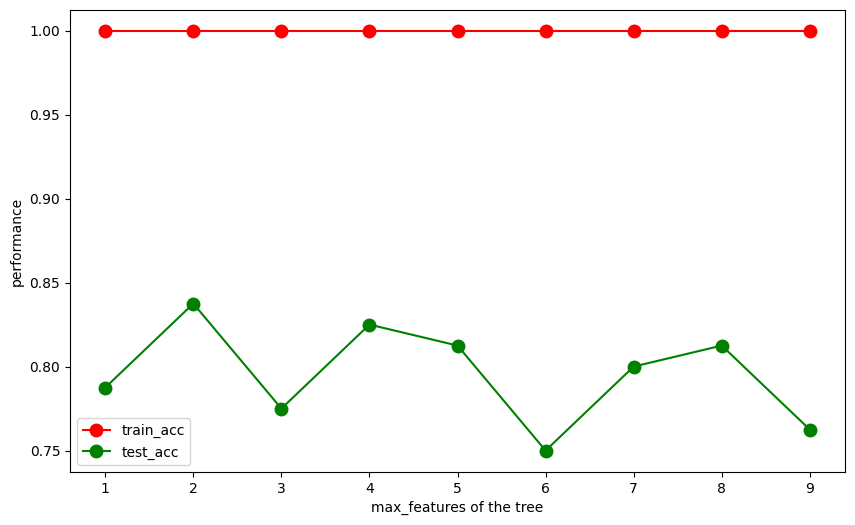

In [ ]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o',markersize=9,color='red')
plt.plot(data['max_features'], data['test_acc'], marker = 'o',markersize=9,color='green')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

Conclusion:The Random forest classifier with the maximum feature as two gives the highest  accuracy of 83.75%. So it is a good model  to know about the segment or attributes which causes high sale in manufacturing company, using Random forest.
